In [1]:
# importing libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')


In [11]:
sharidedata = pd.read_csv('fhv_base_aggregate_report_historical_1.csv')
sharidedata['pickup_start_date'] = pd.to_datetime(gold_df['pickup_start_date'])

In [14]:

sharidedata = sharidedata[['pickup_start_date', 'total_dispatched_trips']]
sharidedata.columns = ['Date', 'Trips']

In [15]:
print(np.min(sharidedata['Date'] ),np.max(sharidedata['Date'] ))
sharidedata = sharidedata.sort_values('Date', ascending=True) 
sharidedata = sharidedata.dropna(how='any')

sharidedata.head()

2015-01-01 00:00:00 2018-08-19 00:00:00


,Date,Trips
77548,2015-01-01,2791
37161,2015-01-01,2704
69365,2015-01-01,205
84707,2015-01-01,328
39162,2015-01-01,176


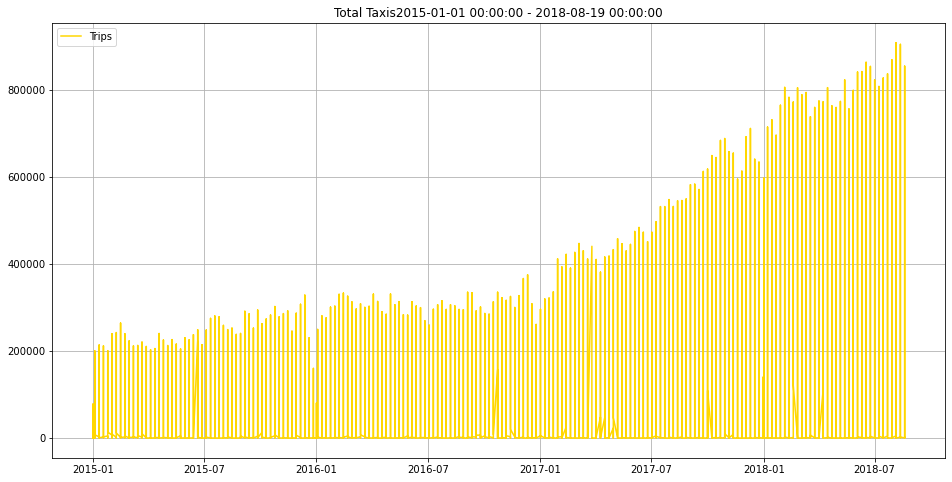

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sharidedata['Date'], sharidedata['Trips'], label='Trips', color='gold')
plt.title('Total Taxis' + str(np.min(sharidedata['Date'])) + ' - ' + str(np.max(sharidedata['Date'])))
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [17]:
sharidedata = sharidedata.sort_values('Date', ascending=True) 

lookback = 30
dates = sharidedata['Date']
prices = list(sharidedata['Trips'].values)
counter_ = -1
price_series = []
for day in dates:
    counter_ += 1
    
    if counter_ >= lookback:
        price_series.append(prices[counter_-lookback:counter_])
                
timeseries_df = pd.DataFrame(price_series)              
 

In [18]:
timeseries_df.shape

(101003, 30)

In [22]:
def split_seq(seq, num_pieces):
   
    start = 0
    for i in range(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
        
def pearson(s1, s2):
    """take two pd.Series objects and return a pearson corrleation"""
    s1_c=s1-np.mean(s1)
    s2_c=s2-np.mean(s2)
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

In [19]:
timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2791,1953,1900,1335,3051,1,2067,807,1839,1178,...,5665,748,122,23,26749,18405,125,151,389,2704
1,1953,1900,1335,3051,1,2067,807,1839,1178,20553,...,748,122,23,26749,18405,125,151,389,2704,205
2,1900,1335,3051,1,2067,807,1839,1178,20553,2740,...,122,23,26749,18405,125,151,389,2704,205,328
3,1335,3051,1,2067,807,1839,1178,20553,2740,2152,...,23,26749,18405,125,151,389,2704,205,328,176
4,3051,1,2067,807,1839,1178,20553,2740,2152,78195,...,26749,18405,125,151,389,2704,205,328,176,241


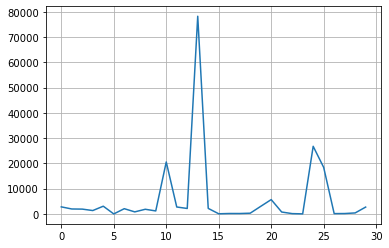

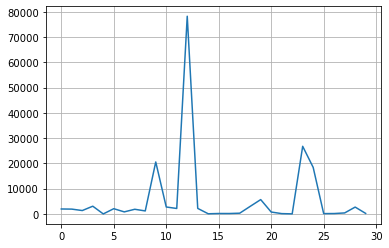

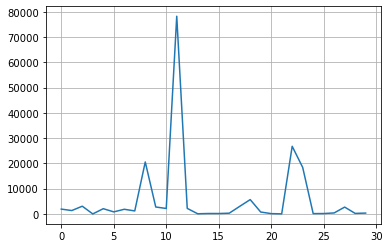

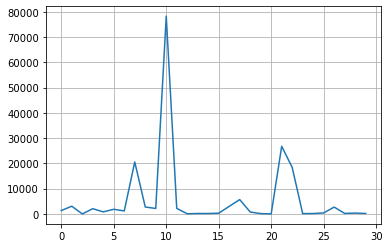

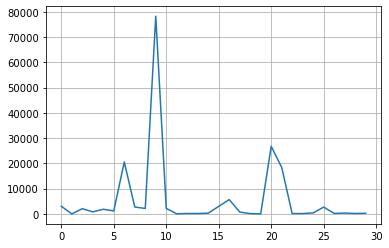

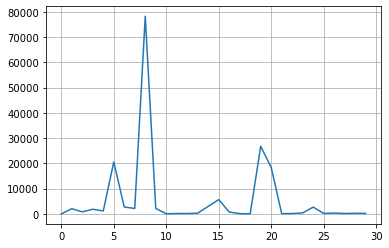

In [20]:
counter = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

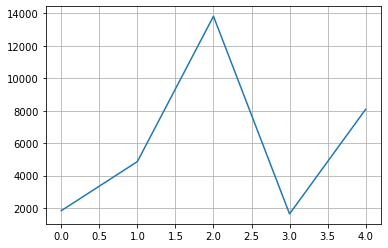

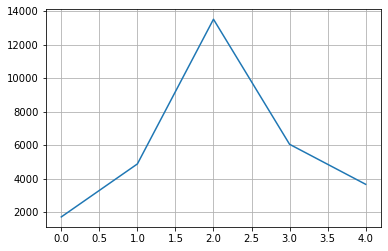

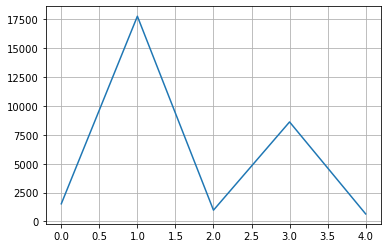

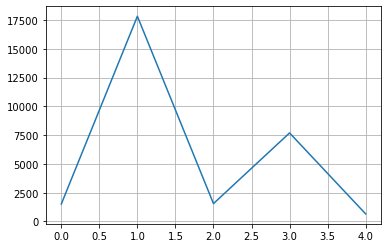

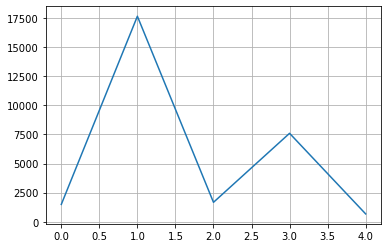

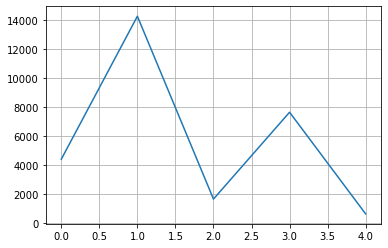

In [23]:
counter = 5
complexity = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    plt.plot([np.mean(r) for r in split_seq(list(row.values), complexity)])
    plt.grid()
    plt.show()
    if counter < 0:
        break

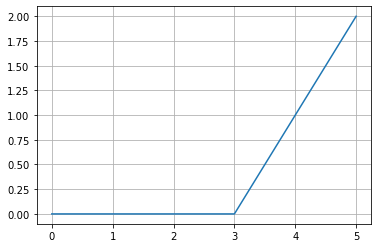

In [25]:
correlate_against = [0,0,0,0,1,2] 
plt.plot(correlate_against)
plt.grid()

In [26]:
complexity = 6
outcome_list = []
for index, row in timeseries_df.iterrows():
    simplified_values = []
    for r in split_seq(list(row.values), complexity):
        simplified_values.append(np.mean(r))
    correz = pearson(simplified_values,correlate_against)
    if correz > 0.5:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

In [27]:
np.mean(outcome_list)


0.17486609308634396

In [28]:
timeseries_df['outcome'] = outcome_list
timeseries_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
0,2791,1953,1900,1335,3051,1,2067,807,1839,1178,...,748,122,23,26749,18405,125,151,389,2704,0
1,1953,1900,1335,3051,1,2067,807,1839,1178,20553,...,122,23,26749,18405,125,151,389,2704,205,0
2,1900,1335,3051,1,2067,807,1839,1178,20553,2740,...,23,26749,18405,125,151,389,2704,205,328,0
3,1335,3051,1,2067,807,1839,1178,20553,2740,2152,...,26749,18405,125,151,389,2704,205,328,176,0
4,3051,1,2067,807,1839,1178,20553,2740,2152,78195,...,18405,125,151,389,2704,205,328,176,241,0
5,1,2067,807,1839,1178,20553,2740,2152,78195,2185,...,125,151,389,2704,205,328,176,241,191,0
6,2067,807,1839,1178,20553,2740,2152,78195,2185,57,...,151,389,2704,205,328,176,241,191,189,0
7,807,1839,1178,20553,2740,2152,78195,2185,57,166,...,389,2704,205,328,176,241,191,189,820,0
8,1839,1178,20553,2740,2152,78195,2185,57,166,159,...,2704,205,328,176,241,191,189,820,363,0
9,1178,20553,2740,2152,78195,2185,57,166,159,286,...,205,328,176,241,191,189,820,363,2694,0


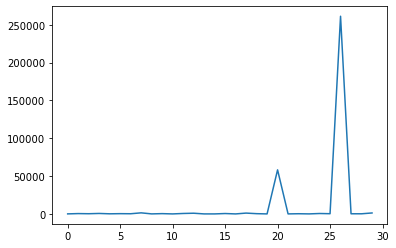

In [30]:
timeseries_df_tmp = timeseries_df[timeseries_df['outcome']==1]
timeseries_df_tmp.tail()
timeseries_df_tmp = timeseries_df_tmp.tail()
example = timeseries_df_tmp.values[0][:-1]
plt.plot(example)

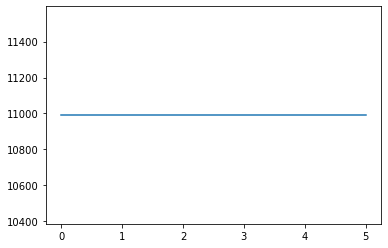

In [31]:
simplified_values = []
for r in split_seq(list(example), complexity):
    simplified_values.append(np.mean(example))
plt.plot(simplified_values)

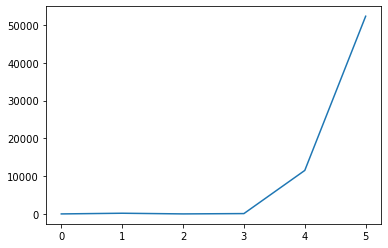

In [32]:
vals = [np.mean(r) for r in split_seq(list(example), complexity)]
np.min(vals)
vals2 = [val - np.min(vals) for val in vals]
plt.plot(vals2)